In [2]:
library(tidyverse, quietly=T)
library(forecast)
library(repr) # Resizing the plots in jupyter
library(rugarch) 
library(readxl)
library(dynlm)
library(Hmisc)
library(gridExtra)

options(repr.plot.width=8, repr.plot.height=4)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.7
v tidyr   0.8.2     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: parallel

Attaching package: 'rugarch'

The following object is masked from 'package:purrr':

    reduce

The following object is masked from 'package:stats':

    sigma

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval

In [3]:
b <- cumsum(rnorm(100))
x <- 1:100
sd <- 1.96*sqrt(1:100)
t <- 1

df <- data.frame(x, b, sd, t)
a1 <- ggplot(df, aes(x,b)) + 
geom_line() + 
geom_line(aes(x,t), color="#045a8d", linetype="dashed") + 
geom_ribbon(aes(ymin=t-sd, ymax=t+sd), alpha=0.09, fill="#045a8d") + 
labs(title="Difference stationary (random walk)", x = "", y = "") +
scale_y_continuous(limits=c(-30, 30), breaks=seq(-30, 30,10))

In [4]:
b <- cumsum(rnorm(100)+0.3)
x <- 1:100
sd <- 1.96 * sqrt(1:100)
t <- 0.3*1:100

df <- data.frame(x, b, sd, t)
a2 <- ggplot(df, aes(x,b)) + 
geom_line() + 
geom_line(aes(x,t), color="#045a8d", linetype="dashed") + 
geom_ribbon(aes(ymin=t-sd, ymax=t+sd), alpha=0.09, fill="#045a8d") + 
labs(title="Difference stationary (stochastic trend)", x = "", y = "") + 
scale_y_continuous(limits=c(-10, 50), breaks=seq(-10, 50,10))

In [5]:
ny <- arima.sim(n = 100, list(ma = c(0.8, 0.4)))

d <- 0
sd <- sqrt(1^2*(1+0.8^2+0.4^2))*1.96
df <- data.frame(x, ny, sd, d)

a3 <- ggplot(df, aes(x,ny)) + 
geom_line() + 
geom_line(aes(x,d), color="#045a8d", linetype="dashed") + 
geom_ribbon(aes(ymin=d-sd, ymax=d+sd), alpha=0.09, fill="#045a8d") + 
labs(title="Stationary", x = "", y = "") + 
scale_y_continuous(limits=c(-15, 15), breaks=seq(-15, 15, 5))

In [6]:
t <- 1:100
ny <- arima.sim(n = 100, list(ma = c(0.8, 0.4)))
ny <- ny + t*0.2

d <- 0 + t*0.2
sd <- sqrt(1^2*(1+0.8^2+0.4^2))*1.96
df <- data.frame(x, ny, sd, d)

a4 <- ggplot(df, aes(x,ny)) + 
geom_line() + 
geom_line(aes(x,d), color="#045a8d", linetype="dashed") + 
geom_ribbon(aes(ymin=d-sd, ymax=d+sd), alpha=0.09, fill="#045a8d") + 
labs(title="Trend stationary (deterministic trend)", x = "", y = "") +
scale_y_continuous(limits=c(-5, 25), breaks=seq(-5, 25, 5))

# Simulation of different data generating processes
Random walk is a special case of a stocastic trend where the trend is 0. Also for difference stationary series shocks are permanent and they might wander far from the trend, these series contain a unit root.

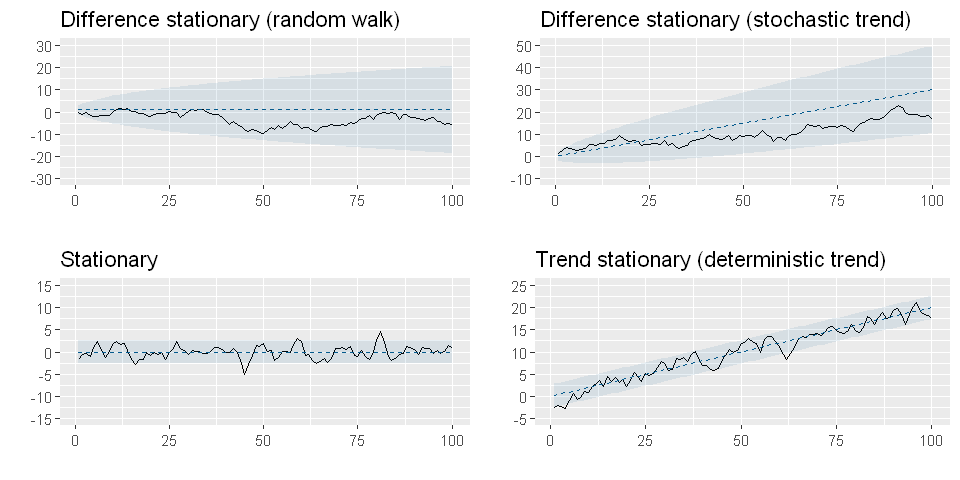

In [9]:
grid.arrange(a1,a2,a3,a4, ncol=2)